In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt  as eks
import ImageView as imv

In [15]:
def constrast(file, k):
    orig_im = imageio.imread(file)
    im = np.copy(orig_im)
    grey_im = np.copy(orig_im)
    grey_im = np.sum(im.astype(float), 2) / (3 * 255)
    im = np.sum(im.astype(float), 2) / (3 * 255)  #gråtone
    img = np.copy(im)
            
    for i in range(10):
        laplace = (im[0:-2, 1:-1] +
            im[2:, 1:-1] +
            im[1:-1, 0:-2] +
            im[1:-1, 2:] -
            4 * im[1:-1, 1:-1] -
            k * (grey_im[0:-2, 1:-1] +
            grey_im[2:, 1:-1] +
            grey_im[1:-1, 0:-2] +
            grey_im[1:-1, 2:] -
           4 * grey_im[1:-1, 1:-1]))
        im[1:-1, 1:-1] += (.25 * laplace)
        im[:, 0] = im[:, 1]      # Neumann randbetingelse
        im[:, -1] = im[:, -2]    #
        im[0, :] = im[1, :]      #
        im[-1, :] = im[-2 , :]   #
        im[im < 0] = 0                                 # klipp til lovlige verdier
        im[im > 1] = 1
    
    imv.viewBW(orig_im, grey_im, im, "Kontrastforsterket") #Displayer bildene ved siden av hverandre

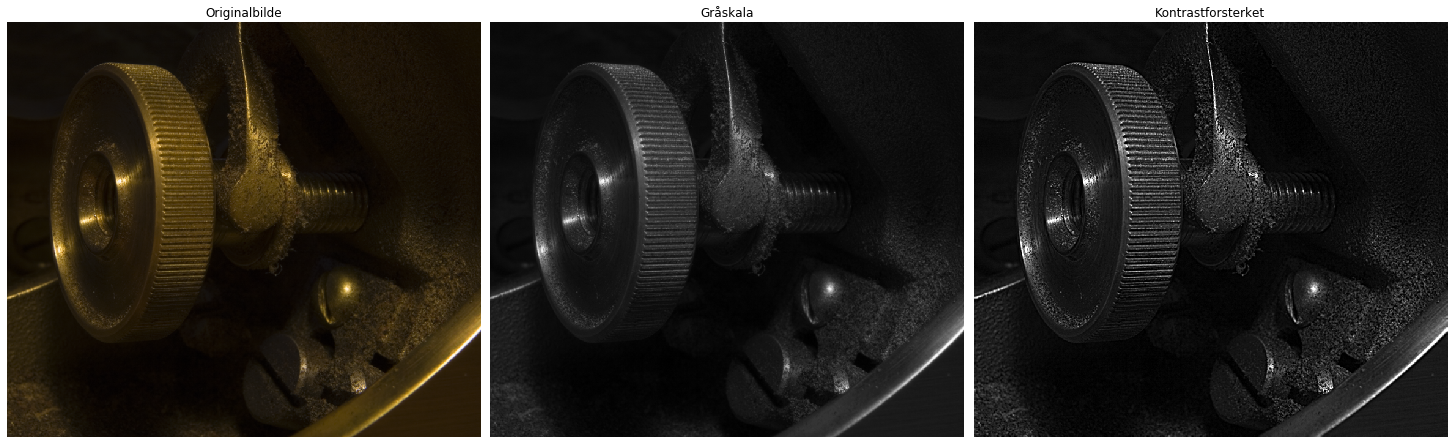

In [18]:
filepath = "..\hdr-bilder\Adjuster\Adjuster_00002.png"
constant = 2.6

constrast(filepath, constant)